In [1]:
from ema_workbench import load_results
from ema_workbench.analysis import pairs_plotting
import matplotlib.pyplot as plt
from ema_workbench.analysis import feature_scoring
import seaborn as sns
from ema_workbench.analysis import prim
import pandas as pd
from SALib.analyze import sobol
from ema_workbench import Samplers
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import Model, RealParameter, ScalarOutcome
from ema_workbench import MultiprocessingEvaluator, ema_logging

from ema_workbench import save_results
import numpy as np

# Read in data

In [2]:
BR_LHS_results2222 = load_results('../../results/results_BR_LHS/results_800_scenarios_BR_seed2222.gz') 
BR_LHS_results4444 = load_results('../../results/results_BR_LHS/results_800_scenarios_BR_seed4444.gz')
BR_LHS_results6666 = load_results('../../results/results_BR_LHS/results_800_scenarios_BR_seed6666.gz')


In [3]:
BR_LHS_experiments2222, BR_LHS_outcomes2222 = BR_LHS_results2222
BR_LHS_experiments4444, BR_LHS_outcomes4444 = BR_LHS_results4444
BR_LHS_experiments6666, BR_LHS_outcomes6666 = BR_LHS_results6666

In [4]:
BR_LHS_experiments6666.keys()

Index(['CA', 'HS', 'LP', 'OA', 'OW', 'RP', 'TA', 'one_way_possible',
       'scenario', 'policy', 'model'],
      dtype='object')

In [5]:
BR_LHS_outcomes2222['continuity_var'] = BR_LHS_outcomes2222['continuity_vars']
BR_LHS_outcomes4444['continuity_var'] = BR_LHS_outcomes4444['continuity_vars']
BR_LHS_outcomes6666['continuity_var'] = BR_LHS_outcomes6666['continuity_vars']

BR_LHS_outcomes2222['connectivity_var'] = BR_LHS_outcomes2222['connectivity_vars']
BR_LHS_outcomes4444['connectivity_var'] = BR_LHS_outcomes4444['connectivity_vars']
BR_LHS_outcomes6666['connectivity_var'] = BR_LHS_outcomes6666['connectivity_vars']

In [6]:
BR_LHS_outcomes2222.pop('continuity_vars')
BR_LHS_outcomes4444.pop('continuity_vars')
BR_LHS_outcomes6666.pop('continuity_vars')

BR_LHS_outcomes2222.pop('connectivity_vars')
BR_LHS_outcomes4444.pop('connectivity_vars')
BR_LHS_outcomes6666.pop('connectivity_vars')

array([2.3768023 , 2.4294881 , 2.55654335, 2.54534926, 2.25535368,
       2.2010364 , 2.55854737, 2.69147581, 2.1994482 , 2.27658566,
       2.82076029, 2.68672924, 2.60399549, 2.2865052 , 2.40634008,
       2.93157141, 2.61528318, 2.78052941, 2.34061428, 2.5367431 ,
       2.41451643, 2.69215154, 2.46380031, 2.41003274, 2.52184854,
       2.44073114, 2.51692545, 2.62751458, 2.66685808, 2.38343298,
       2.19333174, 2.66274117, 2.27312568, 2.71379456, 2.51318213,
       2.31029831, 2.53564945, 2.44360075, 2.86269745, 2.32799552,
       2.71173434, 2.64059265, 2.90299205, 2.42940334, 2.48984498,
       2.13828658, 2.55209758, 2.41280029, 2.60277906, 2.51920723,
       2.15781028, 2.53987213, 2.6989301 , 2.51201193, 2.3786246 ,
       2.09857857, 2.37281026, 2.73055519, 2.36060315, 2.27677747,
       2.91761315, 2.76790768, 2.31641541, 2.61302957, 2.42080429,
       2.7422085 , 2.84433752, 2.43986932, 2.36597349, 2.26690338,
       1.71455241, 2.67842545, 2.47899451, 2.40655531, 2.32820

In [7]:
outcomes_change = BR_LHS_outcomes2222
BR_LHS_outcomes2222 = {}
BR_LHS_outcomes2222["connectivity_mean"] = outcomes_change['connectivity_mean']
BR_LHS_outcomes2222["connectivity_var"] = outcomes_change['connectivity_var']
BR_LHS_outcomes2222["continuity_mean"] = outcomes_change['continuity_mean']
BR_LHS_outcomes2222["continuity_var"] = outcomes_change['continuity_var']
BR_LHS_outcomes2222["node_frequency_mean"] = outcomes_change['node_frequency_mean']
BR_LHS_outcomes2222["node_frequency_var"] = outcomes_change['node_frequency_var']

In [8]:
outcomes_change = BR_LHS_outcomes4444
BR_LHS_outcomes4444 = {}
BR_LHS_outcomes4444["connectivity_mean"] = outcomes_change['connectivity_mean']
BR_LHS_outcomes4444["connectivity_var"] = outcomes_change['connectivity_var']
BR_LHS_outcomes4444["continuity_mean"] = outcomes_change['continuity_mean']
BR_LHS_outcomes4444["continuity_var"] = outcomes_change['continuity_var']
BR_LHS_outcomes4444["node_frequency_mean"] = outcomes_change['node_frequency_mean']
BR_LHS_outcomes4444["node_frequency_var"] = outcomes_change['node_frequency_var']

In [9]:
outcomes_change = BR_LHS_outcomes6666
BR_LHS_outcomes6666 = {}
BR_LHS_outcomes6666["connectivity_mean"] = outcomes_change['connectivity_mean']
BR_LHS_outcomes6666["connectivity_var"] = outcomes_change['connectivity_var']
BR_LHS_outcomes6666["continuity_mean"] = outcomes_change['continuity_mean']
BR_LHS_outcomes6666["continuity_var"] = outcomes_change['continuity_var']
BR_LHS_outcomes6666["node_frequency_mean"] = outcomes_change['node_frequency_mean']
BR_LHS_outcomes6666["node_frequency_var"] = outcomes_change['node_frequency_var']

## Code for making histograms

In [13]:
def make_histogram_full(outcome):
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    histogram = pd.Series(outcome.get("continuity_mean"))
    axs[0, 0].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[0, 0].set_title("Continuity_mean")
    axs[0, 0].set_xlabel('Value')
    axs[0, 0].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("continuity_vars"))
    axs[0, 1].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[0, 1].set_title("Continuity_vars")
    axs[0, 1].set_xlabel('Value')
    axs[0, 1].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("connectivity_mean"))
    axs[1, 0].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[1, 0].set_title("Connectivity_mean")
    axs[1, 0].set_xlabel('Value')
    axs[1, 0].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("connectivity_vars"))
    axs[1, 1].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[1, 1].set_title("Connectivity_vars")
    axs[1, 1].set_xlabel('Value')
    axs[1, 1].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("node_frequency_mean"))
    axs[2, 0].hist(histogram, bins=20, rwidth=0.9,
                          color='#607c8e')
    axs[2, 0].set_title("node_frequency_mean")
    axs[2, 0].set_xlabel('Value')
    axs[2, 0].set_ylabel('Frequency')


    histogram = pd.Series(outcome.get("node_frequency_var"))
    axs[2, 1].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[2, 1].set_title("node_frequency_vars")
    axs[2, 1].set_xlabel('Value')
    axs[2, 1].set_ylabel('Frequency')

## Feature importance and plotting outcomes per seed

### Seed 2222

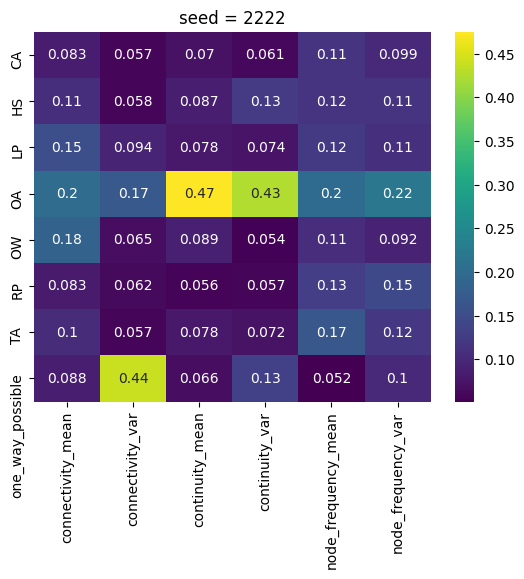

In [37]:
fs = feature_scoring.get_feature_scores_all(BR_LHS_experiments2222, BR_LHS_outcomes2222)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 2222")
plt.savefig('BR_OW_ETRF_seed2222.png', bbox_inches='tight')

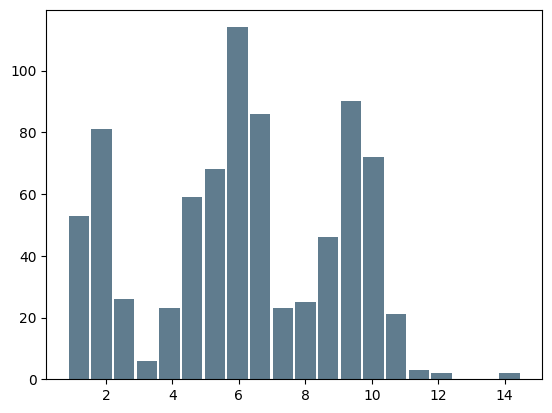

In [13]:
histogram = pd.Series(BR_LHS_outcomes2222.get("continuity_var"))
fig, ax = plt.subplots()
ax.hist(histogram, bins=20, rwidth=0.9,
                       color='#607c8e')

plt.savefig('BR_OW_hist_continuity_var_seed2222.png', bbox_inches='tight')

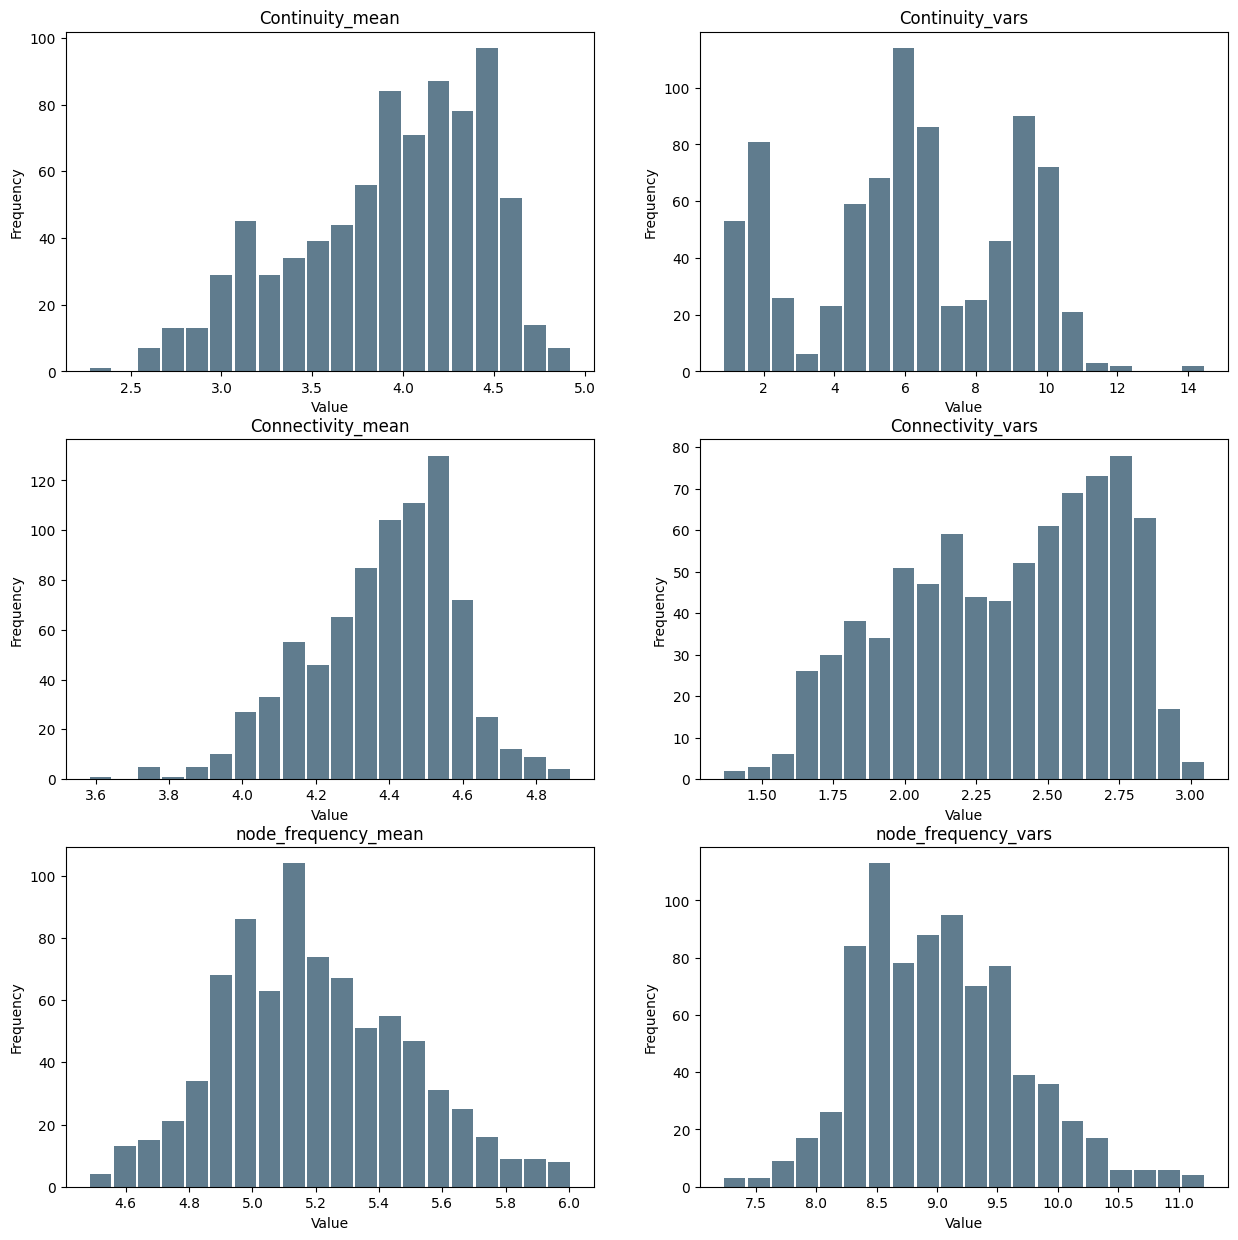

In [16]:
make_histogram_full(BR_LHS_outcomes2222)

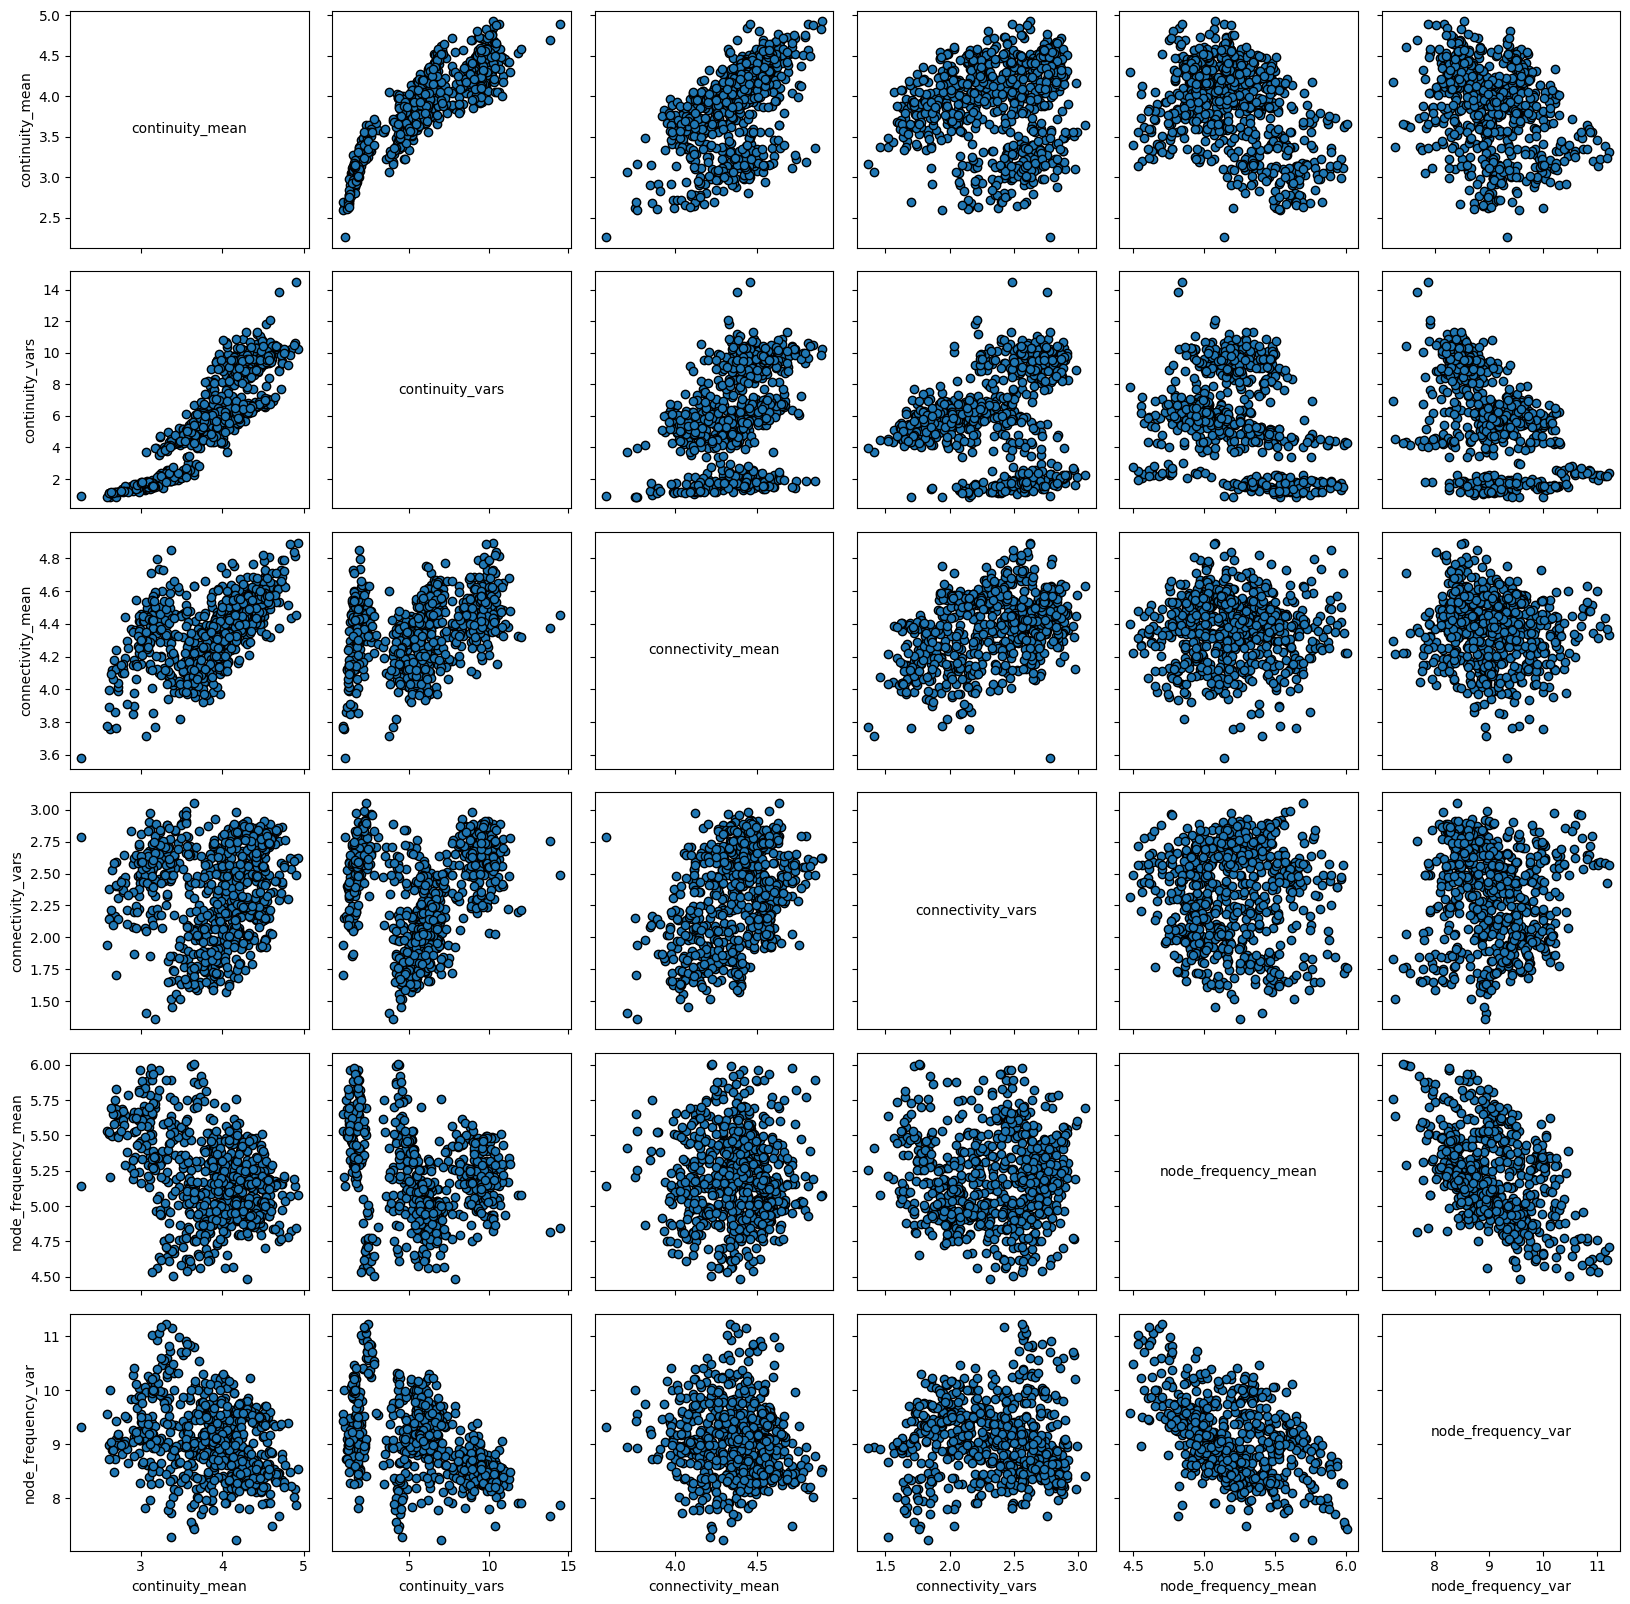

In [20]:
fig, axes = pairs_plotting.pairs_scatter(BR_LHS_experiments2222, BR_LHS_outcomes2222, legend=True)
fig.set_size_inches(20, 20)
plt.show()

### After removing one way possible

In [24]:
outcomes2222_noOWP = {"continuity_mean": [], "continuity_vars": [], "connectivity_mean": [], "connectivity_vars": [], "node_frequency_mean" : [], "node_frequency_var": []}

In [25]:
for i in BR_LHS_experiments2222[BR_LHS_experiments2222['one_way_possible']].index.values.tolist():
    outcomes2222_noOWP["continuity_mean"].append(BR_LHS_ourtomes2222['continuity_mean'][i])
    outcomes2222_noOWP["continuity_vars"].append(BR_LHS_ourtomes2222['continuity_vars'][i])
    outcomes2222_noOWP["connectivity_mean"].append(BR_LHS_ourtomes2222['connectivity_mean'][i])
    outcomes2222_noOWP["connectivity_vars"].append(BR_LHS_ourtomes2222['connectivity_vars'][i])
    outcomes2222_noOWP["node_frequency_mean"].append(BR_LHS_ourtomes2222['node_frequency_mean'][i])
    outcomes2222_noOWP["node_frequency_var"].append(BR_LHS_ourtomes2222['node_frequency_var'][i])

<Axes: ylabel='0'>

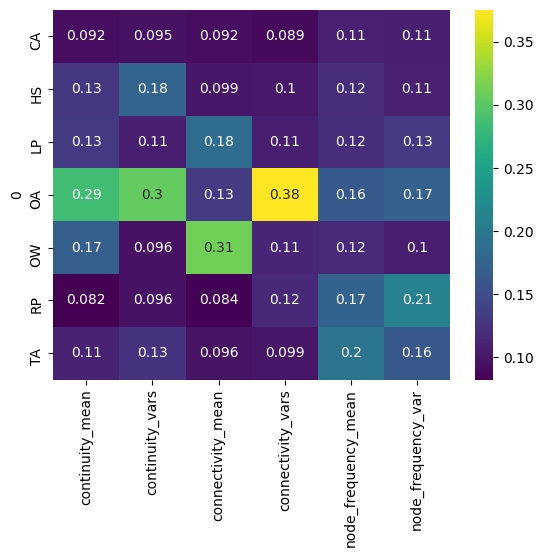

In [27]:
fs = feature_scoring.get_feature_scores_all(BR_LHS_experiments2222[BR_LHS_experiments2222['one_way_possible']][['CA', 'HS', 'LP', 'OA', 'OW', 'RP', 'TA', 'one_way_possible']], outcomes2222_noOWP)
sns.heatmap(fs, cmap="viridis", annot=True)

### Seed 4444

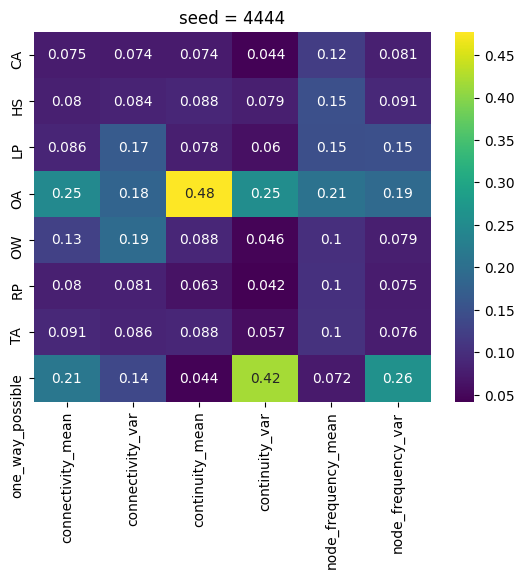

In [41]:
fs = feature_scoring.get_feature_scores_all(BR_LHS_experiments4444, BR_LHS_outcomes4444)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 4444")
plt.savefig('BR_OW_ETRF_seed4444.png', bbox_inches='tight')

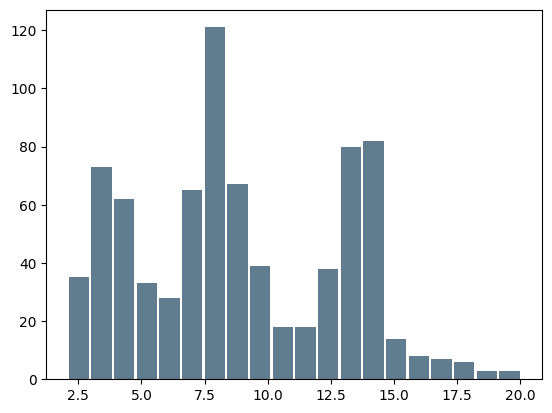

In [11]:
histogram = pd.Series(BR_LHS_outcomes4444.get("continuity_var"))
fig, ax = plt.subplots()
ax.hist(histogram, bins=20, rwidth=0.9,
                       color='#607c8e')

plt.savefig('BR_OW_hist_continuity_var_seed4444.png', bbox_inches='tight')

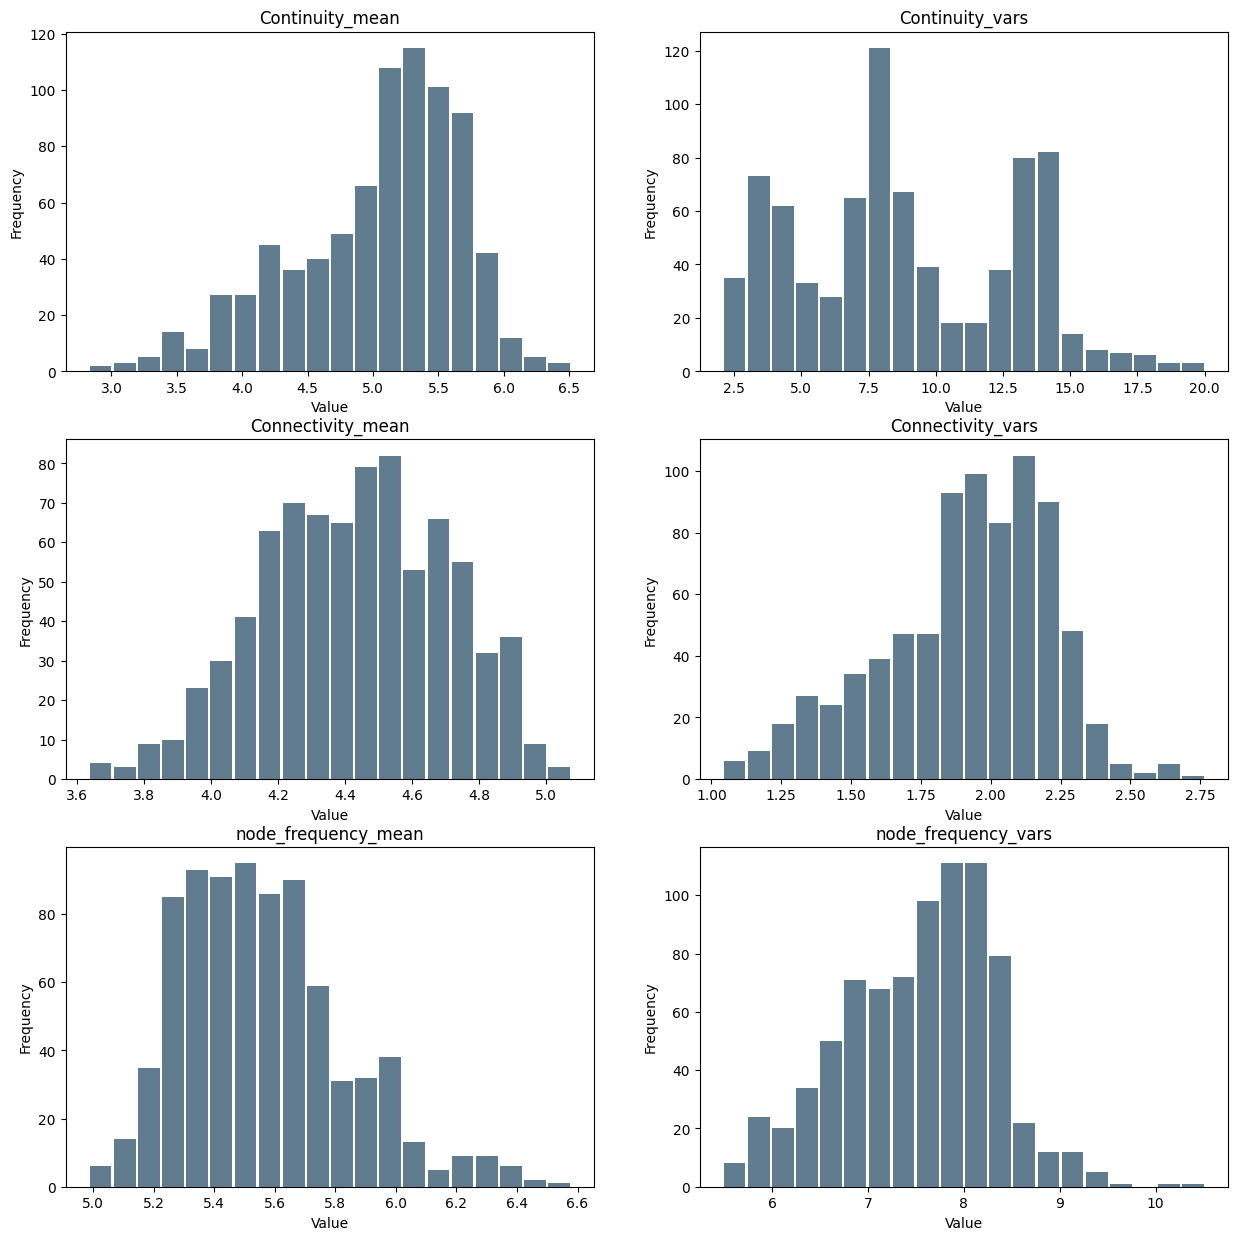

In [18]:
make_histogram_full(BR_LHS_outcomes4444)

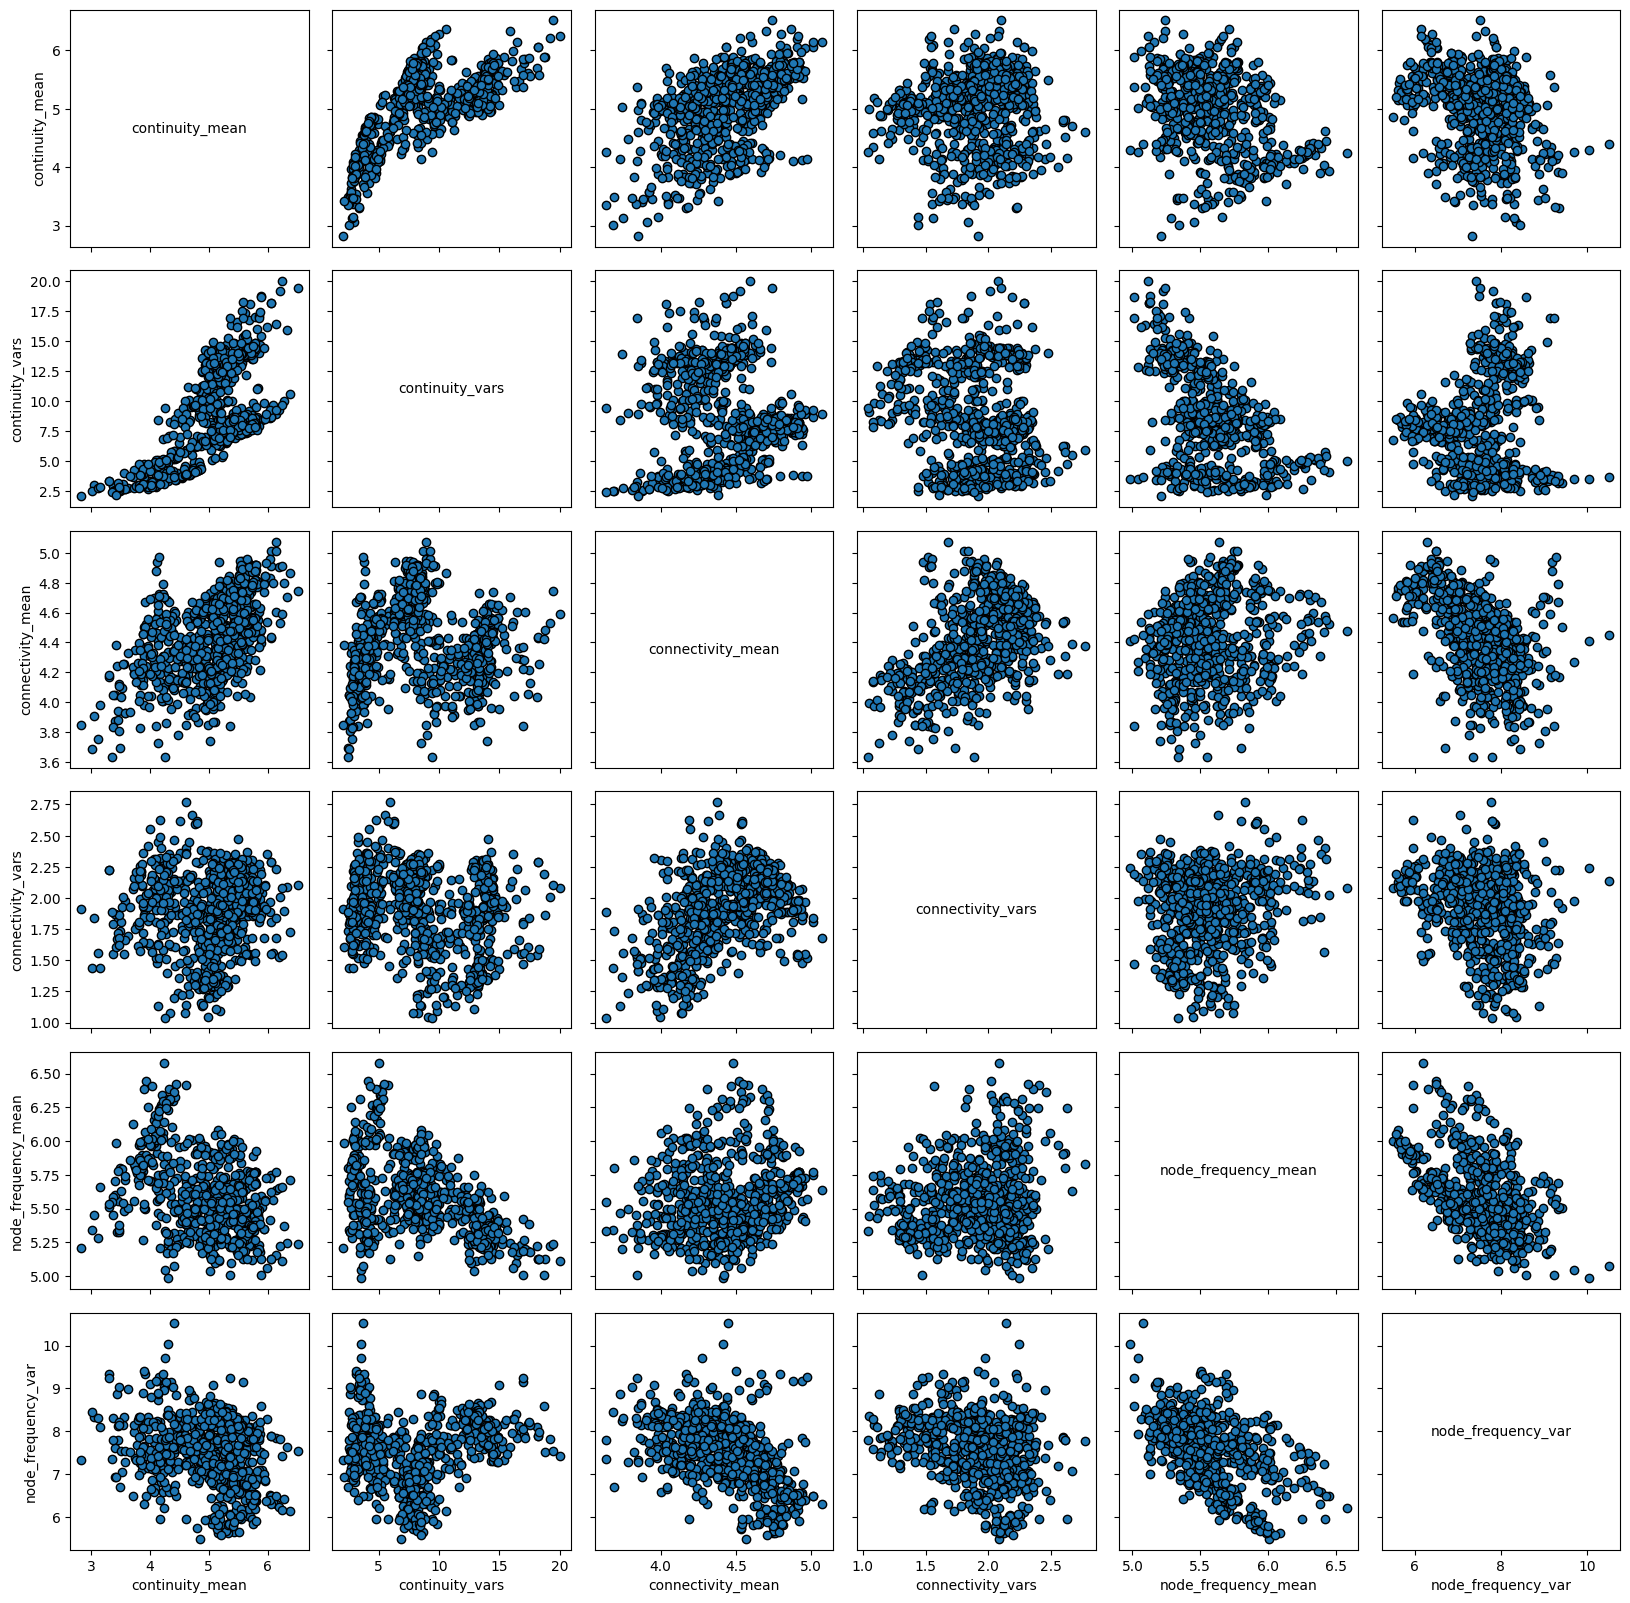

In [22]:
fig, axes = pairs_plotting.pairs_scatter(BR_LHS_experiments4444, BR_LHS_outcomes4444, legend=True)
fig.set_size_inches(20, 20)
plt.show()

### After removing one way possible

In [28]:
outcomes4444_noOWP = {"continuity_mean": [], "continuity_vars": [], "connectivity_mean": [], "connectivity_vars": [], "node_frequency_mean" : [], "node_frequency_var": []}

In [31]:
for i in BR_LHS_experiments2222[BR_LHS_experiments2222['one_way_possible']].index.values.tolist():
    outcomes4444_noOWP["continuity_mean"].append(BR_LHS_ourtomes4444['continuity_mean'][i])
    outcomes4444_noOWP["continuity_vars"].append(BR_LHS_ourtomes4444['continuity_vars'][i])
    outcomes4444_noOWP["connectivity_mean"].append(BR_LHS_ourtomes4444['connectivity_mean'][i])
    outcomes4444_noOWP["connectivity_vars"].append(BR_LHS_ourtomes4444['connectivity_vars'][i])
    outcomes4444_noOWP["node_frequency_mean"].append(BR_LHS_ourtomes4444['node_frequency_mean'][i])
    outcomes4444_noOWP["node_frequency_var"].append(BR_LHS_ourtomes4444['node_frequency_var'][i])

<Axes: ylabel='0'>

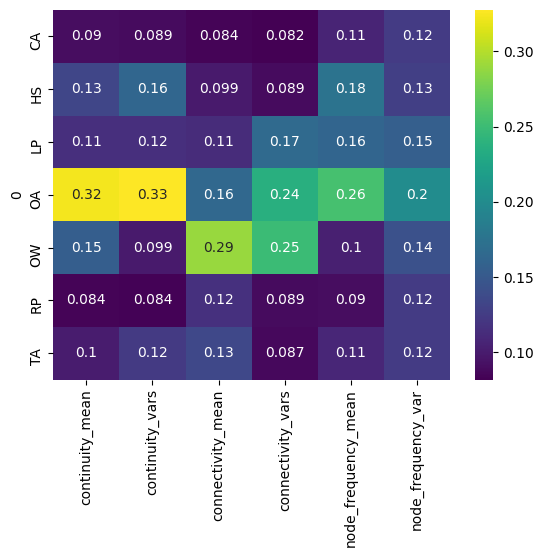

In [30]:
fs = feature_scoring.get_feature_scores_all(BR_LHS_experiments4444[BR_LHS_experiments4444['one_way_possible']][['CA', 'HS', 'LP', 'OA', 'OW', 'RP', 'TA', 'one_way_possible']], outcomes4444_noOWP)
sns.heatmap(fs, cmap="viridis", annot=True)

### Seed 6666

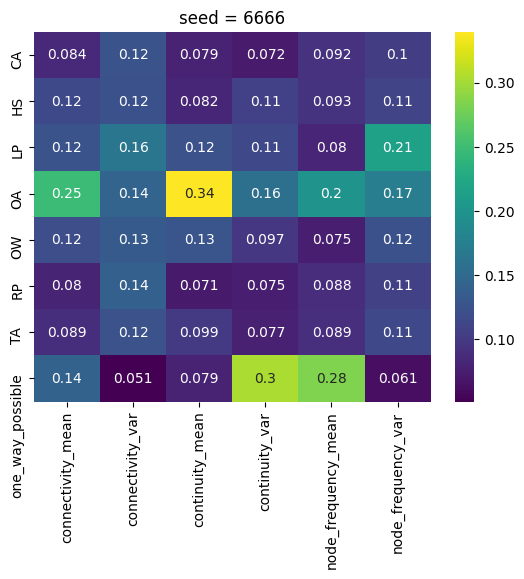

In [40]:
fs = feature_scoring.get_feature_scores_all(BR_LHS_experiments6666, BR_LHS_outcomes6666)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.title("seed = 6666")
plt.savefig('BR_OW_ETRF_seed6666.png', bbox_inches='tight')

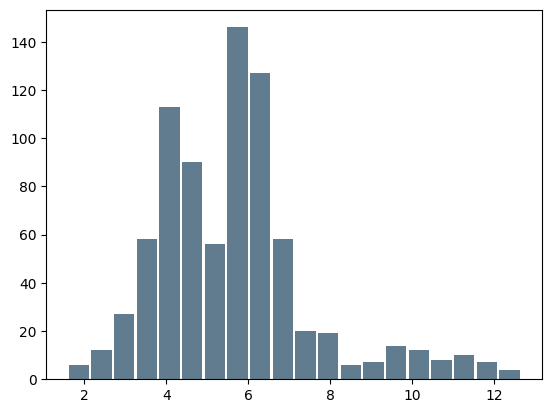

In [12]:
histogram = pd.Series(BR_LHS_outcomes6666.get("continuity_var"))
fig, ax = plt.subplots()
ax.hist(histogram, bins=20, rwidth=0.9,
                       color='#607c8e')

plt.savefig('BR_OW_hist_continuity_var_seed6666.png', bbox_inches='tight')

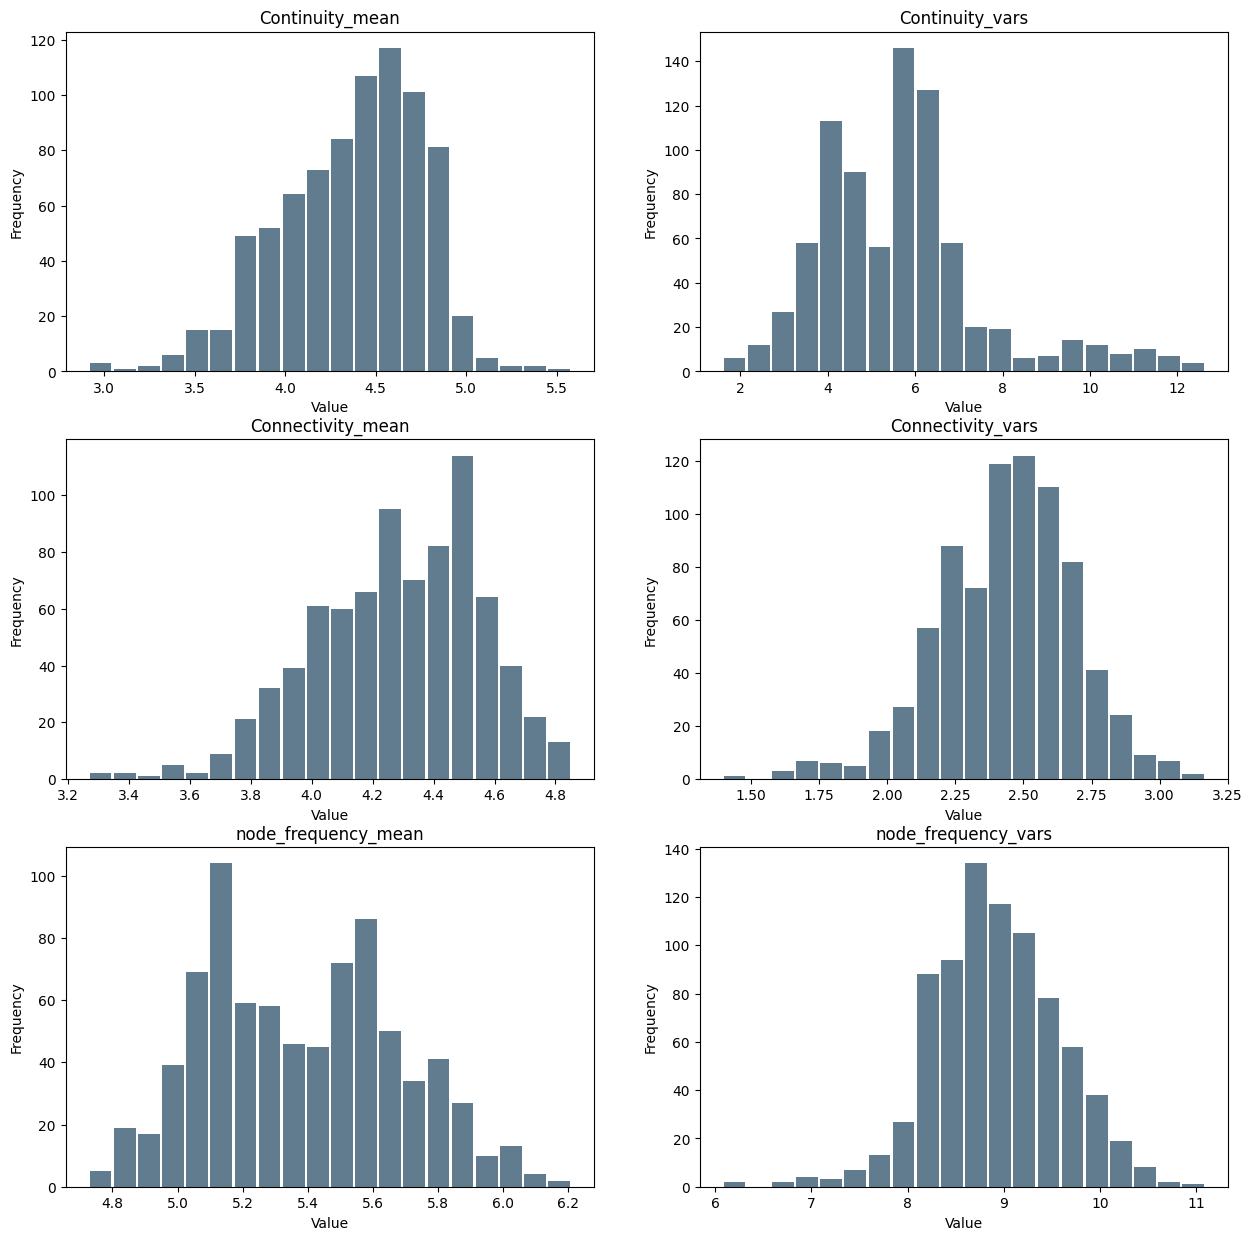

In [19]:
make_histogram_full(BR_LHS_outcomes6666)

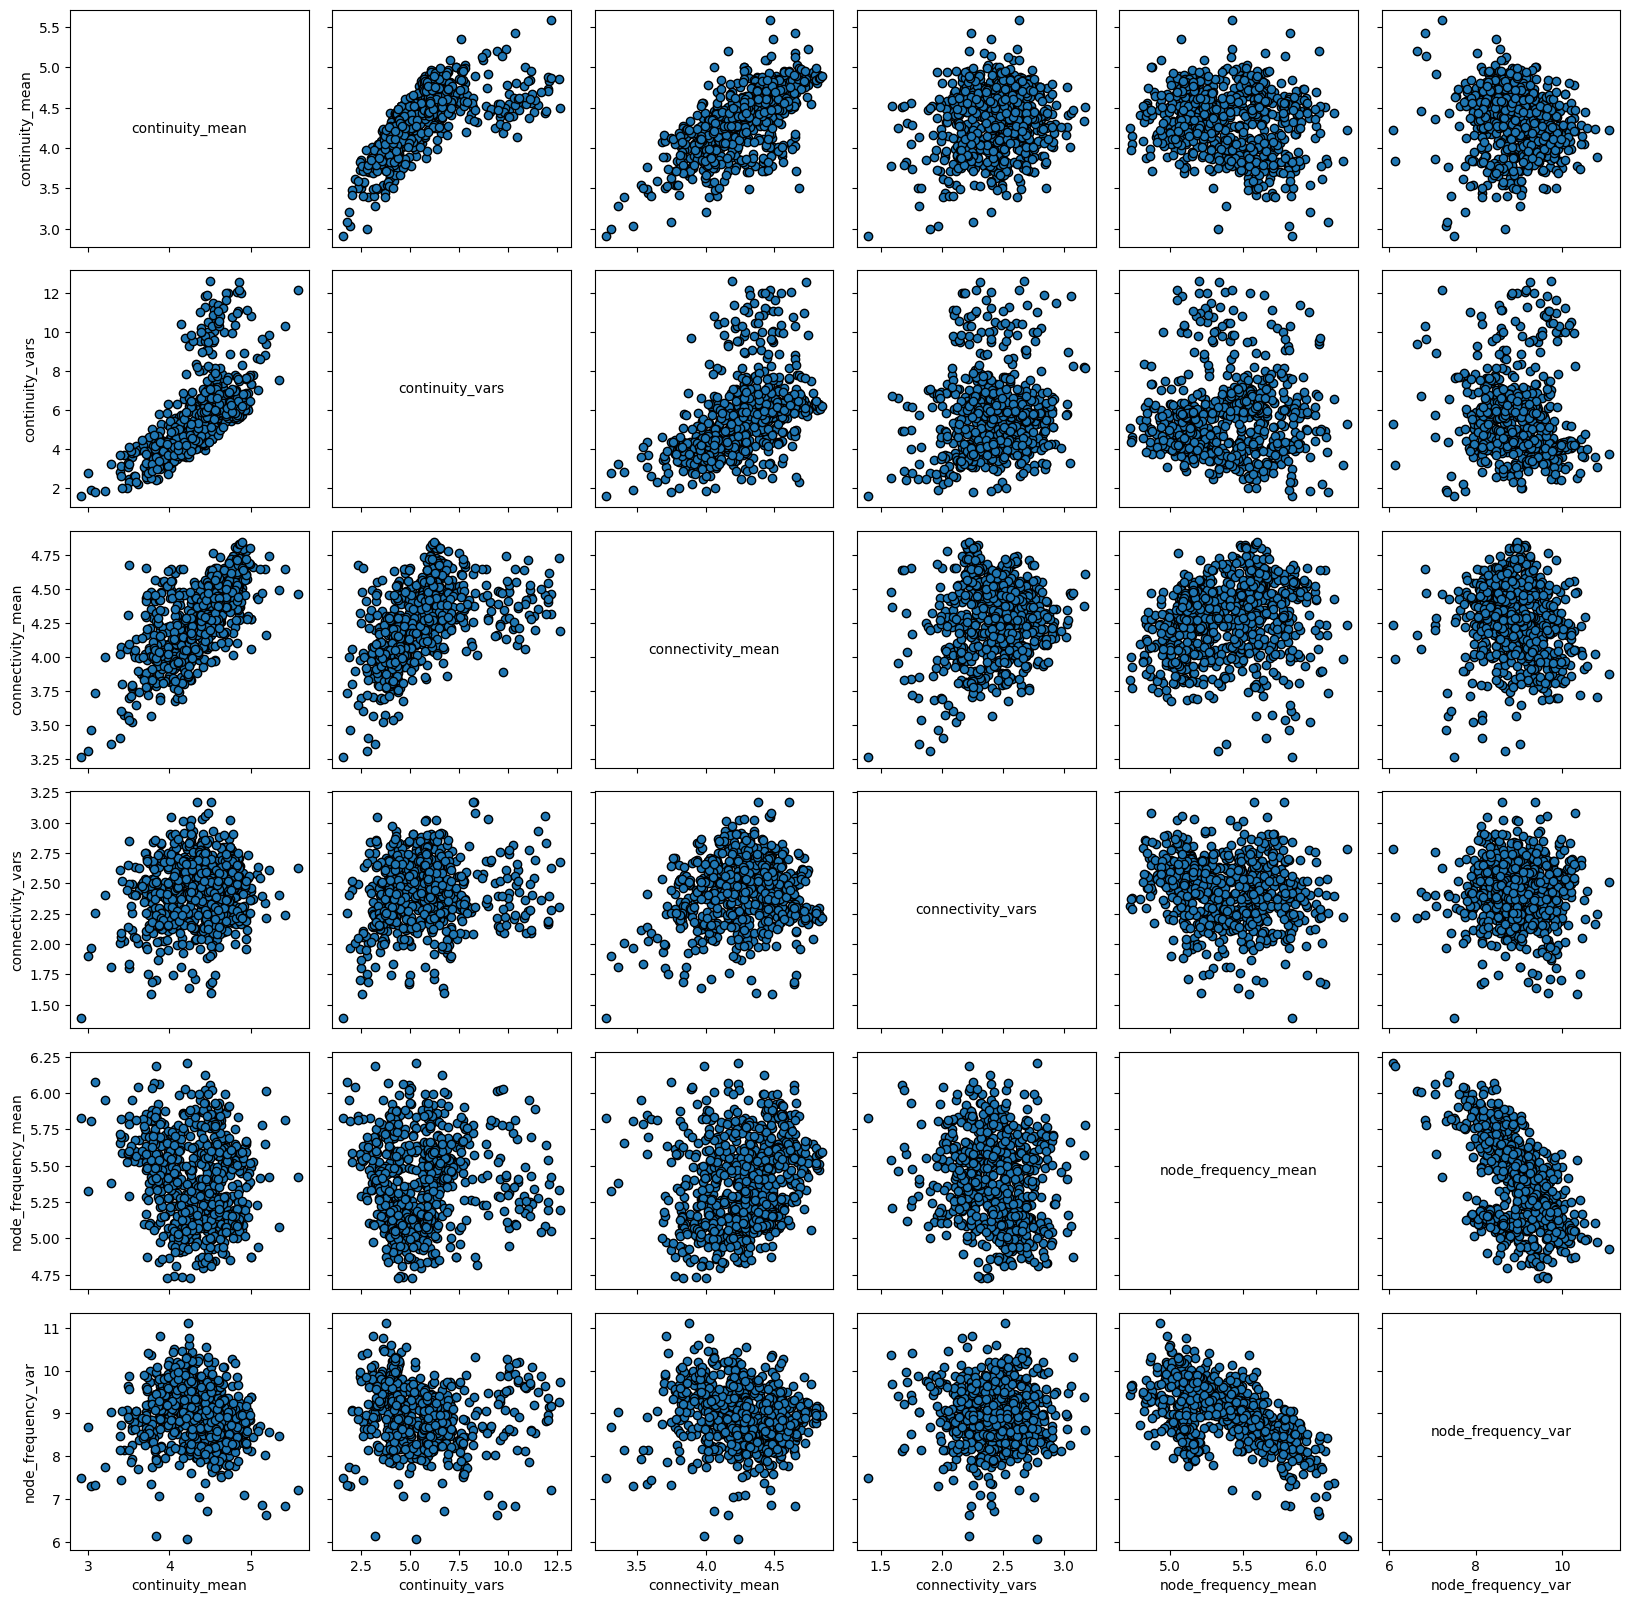

In [23]:
fig, axes = pairs_plotting.pairs_scatter(BR_LHS_experiments6666, BR_LHS_outcomes6666, legend=True)
fig.set_size_inches(20, 20)
plt.show()

### After removing one way possible

In [33]:
outcomes6666_noOWP = {"continuity_mean": [], "continuity_vars": [], "connectivity_mean": [], "connectivity_vars": [], "node_frequency_mean" : [], "node_frequency_var": []}

In [34]:
for i in BR_LHS_experiments2222[BR_LHS_experiments6666['one_way_possible']].index.values.tolist():
    outcomes6666_noOWP["continuity_mean"].append(BR_LHS_outcomes6666['continuity_mean'][i])
    outcomes6666_noOWP["continuity_vars"].append(BR_LHS_outcomes6666['continuity_vars'][i])
    outcomes6666_noOWP["connectivity_mean"].append(BR_LHS_outcomes6666['connectivity_mean'][i])
    outcomes6666_noOWP["connectivity_vars"].append(BR_LHS_outcomes6666['connectivity_vars'][i])
    outcomes6666_noOWP["node_frequency_mean"].append(BR_LHS_outcomes6666['node_frequency_mean'][i])
    outcomes6666_noOWP["node_frequency_var"].append(BR_LHS_outcomes6666['node_frequency_var'][i])

<Axes: ylabel='0'>

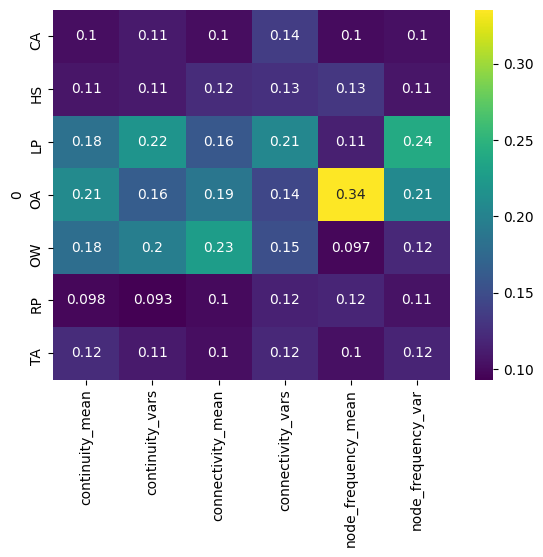

In [35]:
fs = feature_scoring.get_feature_scores_all(BR_LHS_experiments6666[BR_LHS_experiments6666['one_way_possible']][['CA', 'HS', 'LP', 'OA', 'OW', 'RP', 'TA', 'one_way_possible']], outcomes6666_noOWP)
sns.heatmap(fs, cmap="viridis", annot=True)

# Combined results

In [15]:
BR_LHS_experiments2222['seed']=2222
BR_LHS_experiments4444['seed']=4444
BR_LHS_experiments6666['seed']=6666


In [16]:
experiments_combined = pd.concat([BR_LHS_experiments2222, BR_LHS_experiments4444, BR_LHS_experiments6666], ignore_index=True, sort=False)

In [17]:
experiments_combined

CA        HS        LP          OA          OW        RP  \
0     1.042803  0.768104  0.367888  159.311914   28.813413  0.530157   
1     3.553359  0.985169  0.296342  131.807514  509.335729  0.861002   
2     1.876762  0.438488  0.170852   31.603836   22.682010  0.508852   
3     4.679279  0.799267  0.629312  103.020604  201.559898  0.324556   
4     2.210975  0.878460  0.214046   35.428330  301.767454  0.888701   
...        ...       ...       ...         ...         ...       ...   
2395  4.575353  0.939348  0.842662   26.228439  286.186563  0.265035   
2396  4.835367  0.748217  0.300672  163.601250  460.914881  0.338676   
2397  1.360074  0.459185  0.740382  127.655052  172.769468  0.441603   
2398  2.179859  0.179581  0.326470   75.083735   49.200636  0.972990   
2399  1.185474  0.252842  0.929294    4.901745  501.278981  0.459150   

            TA  one_way_possible  scenario policy       model  seed  
0     4.839051             False         0   None  routemodel  2222  
1     1.415057             False         1   None  routemodel  2222  
2     3.820990              True         2   None  routemodel  2222  
3     4.464625              True         3   None  routemodel  2222  
4     4.356213              True         4   None  routemodel  2222  
...        ...               ...       ...    ...         ...   ...  
2395  2.104877              True       795   None  routemodel  6666  
2396  2.800765             False       796   None  routemodel  6666  
2397  3.869779             False       797   None  routemodel  6666  
2398  2.559978             False       798   None  routemodel  6666  
2399  3.100393             False       799   None  routemodel  6666  

[2400 rows x 12 columns]

In [18]:
outcomes_2222_pd = pd.DataFrame.from_dict(BR_LHS_outcomes2222)
outcomes_4444_pd = pd.DataFrame.from_dict(BR_LHS_outcomes4444)
outcomes_6666_pd = pd.DataFrame.from_dict(BR_LHS_outcomes6666)


In [19]:
outcomes_combined = pd.concat([outcomes_2222_pd, outcomes_4444_pd, outcomes_6666_pd], ignore_index=True, sort=False)

In [54]:
experiments_combined

CA        HS        LP          OA          OW        RP  \
0     1.042803  0.768104  0.367888  159.311914   28.813413  0.530157   
1     3.553359  0.985169  0.296342  131.807514  509.335729  0.861002   
2     1.876762  0.438488  0.170852   31.603836   22.682010  0.508852   
3     4.679279  0.799267  0.629312  103.020604  201.559898  0.324556   
4     2.210975  0.878460  0.214046   35.428330  301.767454  0.888701   
...        ...       ...       ...         ...         ...       ...   
2395  4.575353  0.939348  0.842662   26.228439  286.186563  0.265035   
2396  4.835367  0.748217  0.300672  163.601250  460.914881  0.338676   
2397  1.360074  0.459185  0.740382  127.655052  172.769468  0.441603   
2398  2.179859  0.179581  0.326470   75.083735   49.200636  0.972990   
2399  1.185474  0.252842  0.929294    4.901745  501.278981  0.459150   

            TA  one_way_possible  scenario policy       model  seed  
0     4.839051             False         0   None  routemodel  2222  
1     1.415057             False         1   None  routemodel  2222  
2     3.820990              True         2   None  routemodel  2222  
3     4.464625              True         3   None  routemodel  2222  
4     4.356213              True         4   None  routemodel  2222  
...        ...               ...       ...    ...         ...   ...  
2395  2.104877              True       795   None  routemodel  6666  
2396  2.800765             False       796   None  routemodel  6666  
2397  3.869779             False       797   None  routemodel  6666  
2398  2.559978             False       798   None  routemodel  6666  
2399  3.100393             False       799   None  routemodel  6666  

[2400 rows x 12 columns]

In [56]:
cols = experiments_combined.columns.tolist()

In [57]:
cols

['CA',
 'HS',
 'LP',
 'OA',
 'OW',
 'RP',
 'TA',
 'one_way_possible',
 'scenario',
 'policy',
 'model',
 'seed']

In [60]:
experiments_combined = experiments_combined[['CA',
 'HS',
 'LP',
 'OA',
 'OW',
 'RP',
 'TA','seed',
 'one_way_possible',
 'scenario',
 'policy',
 'model'
 ]]

In [62]:
experiments_combined.columns

Index(['CA', 'HS', 'LP', 'OA', 'OW', 'RP', 'TA', 'seed', 'one_way_possible',
       'scenario', 'policy', 'model'],
      dtype='object')

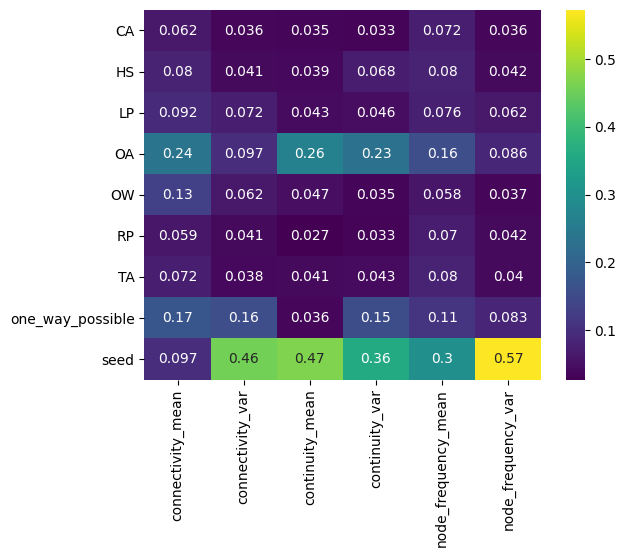

In [63]:
fs = feature_scoring.get_feature_scores_all(experiments_combined, outcomes_combined)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('BR_OW_ETRF.png', bbox_inches='tight')

In [17]:
experiments_combined.keys()

Index(['CA', 'HS', 'LP', 'OA', 'OW', 'RP', 'TA', 'one_way_possible',
       'scenario', 'policy', 'model', 'seed'],
      dtype='object')

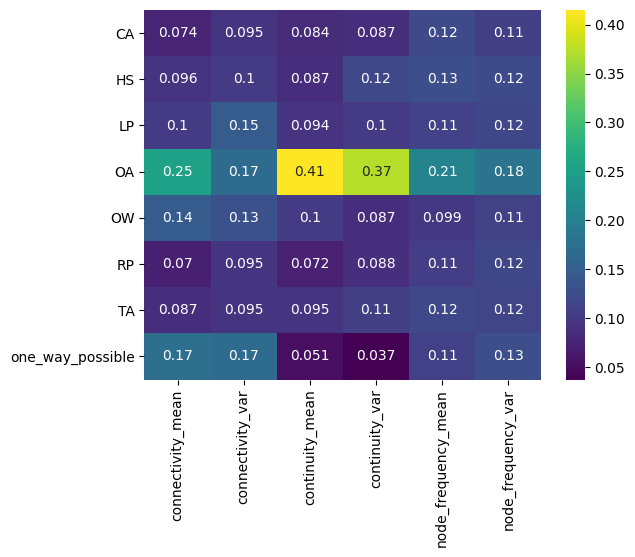

In [21]:
fs = feature_scoring.get_feature_scores_all(experiments_combined[['CA', 'HS', 'LP', 'OA', 'OW', 'RP', 'TA', 'one_way_possible']], outcomes_combined)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.yticks(rotation=0) 
plt.savefig('BR_OW_ETRF_withoutOW.png', bbox_inches='tight')

In [ ]:
outcomes_combined = {}
outcomes_combined['continuity_mean'] = np.concatenate((BR_LHS_outcomes2222['continuity_mean'], BR_LHS_outcomes4444['continuity_mean'], BR_LHS_outcomes6666['continuity_mean']))
outcomes_combined['continuity_vars'] = np.concatenate((BR_LHS_outcomes2222['continuity_vars'], BR_LHS_outcomes4444['continuity_vars'], BR_LHS_outcomes6666['continuity_vars']))
outcomes_combined['connectivity_mean'] = np.concatenate((BR_LHS_outcomes2222['connectivity_mean'], BR_LHS_outcomes4444['connectivity_mean'], BR_LHS_outcomes6666['connectivity_mean']))
outcomes_combined['connectivity_vars'] = np.concatenate((BR_LHS_outcomes2222['connectivity_vars'], BR_LHS_outcomes4444['connectivity_vars'], BR_LHS_outcomes6666['connectivity_vars']))
outcomes_combined['node_frequency_mean'] = np.concatenate((BR_LHS_outcomes2222['node_frequency_mean'], BR_LHS_outcomes4444['node_frequency_mean'], BR_LHS_outcomes6666['node_frequency_mean']))
outcomes_combined['node_frequency_var'] = np.concatenate((BR_LHS_outcomes2222['node_frequency_var'], BR_LHS_outcomes4444['node_frequency_var'], BR_LHS_outcomes6666['node_frequency_var']))


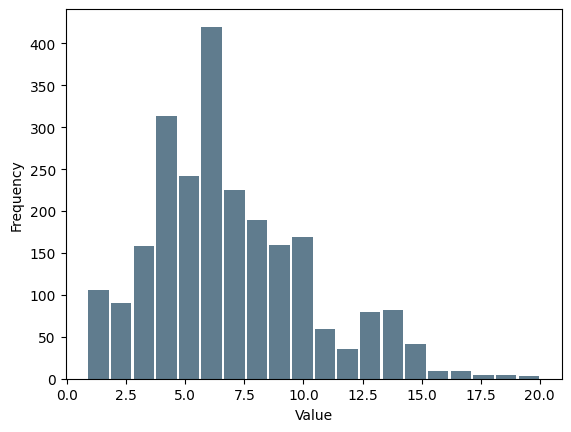

In [20]:
histogram = pd.Series(outcomes_combined.get("continuity_var"))
fig, ax = plt.subplots()
ax.hist(histogram, bins=20, rwidth=0.9,
                       color='#607c8e')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

plt.savefig('BR_OW_hist_continuity_var_combined.png', bbox_inches='tight')

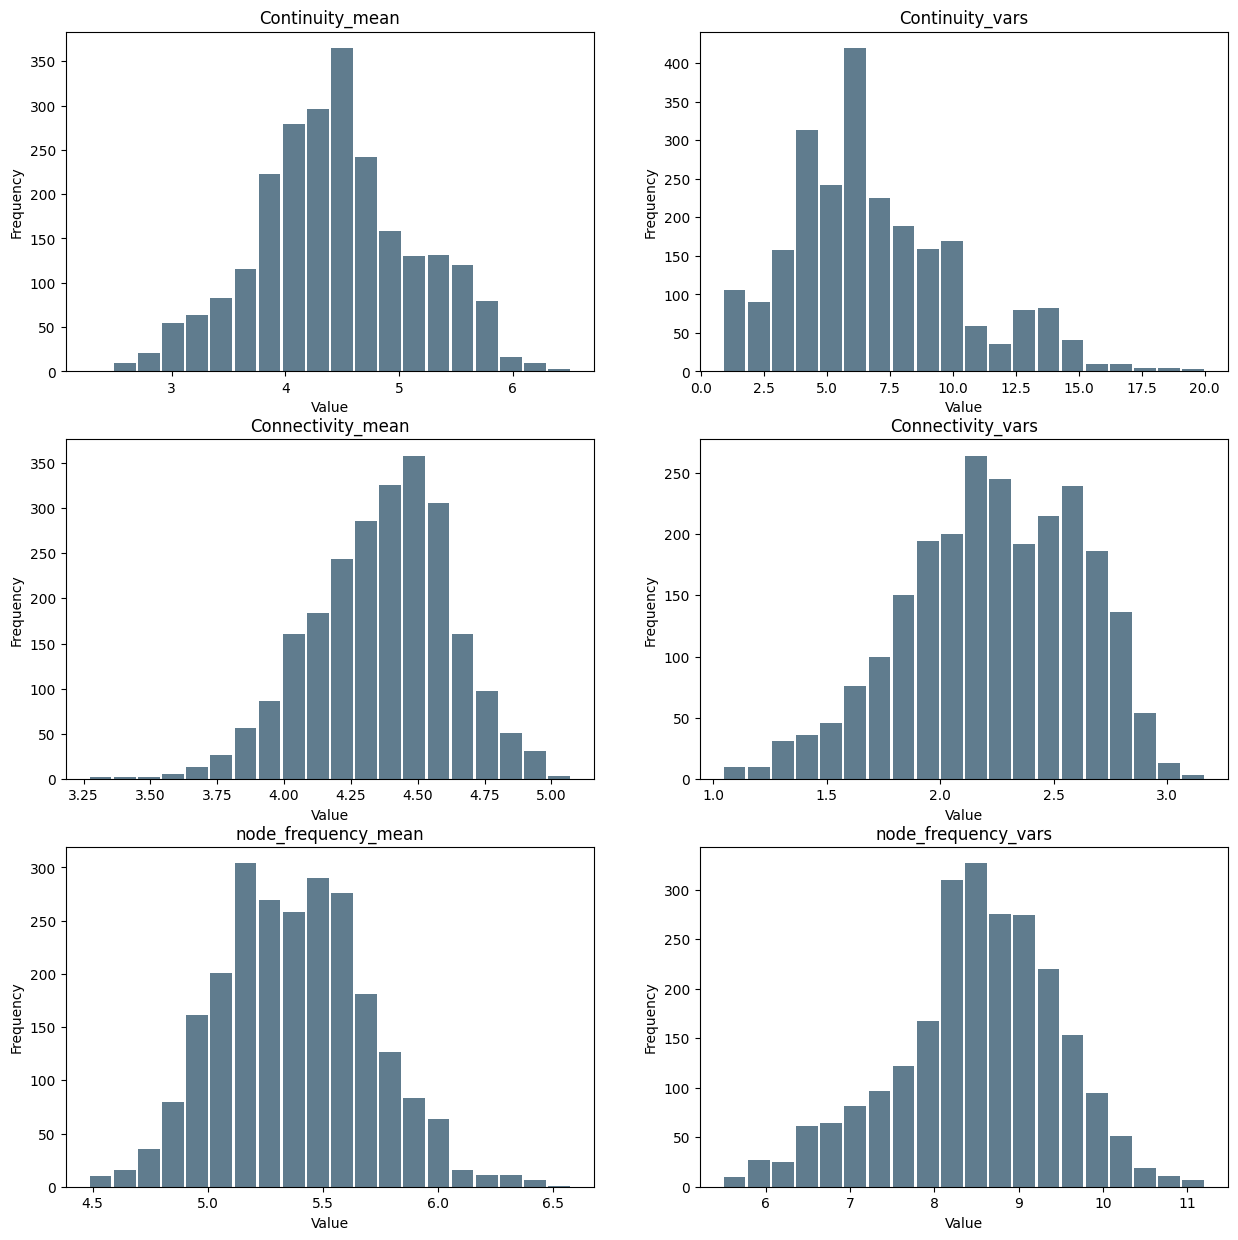

In [14]:
make_histogram_full(outcomes_combined)

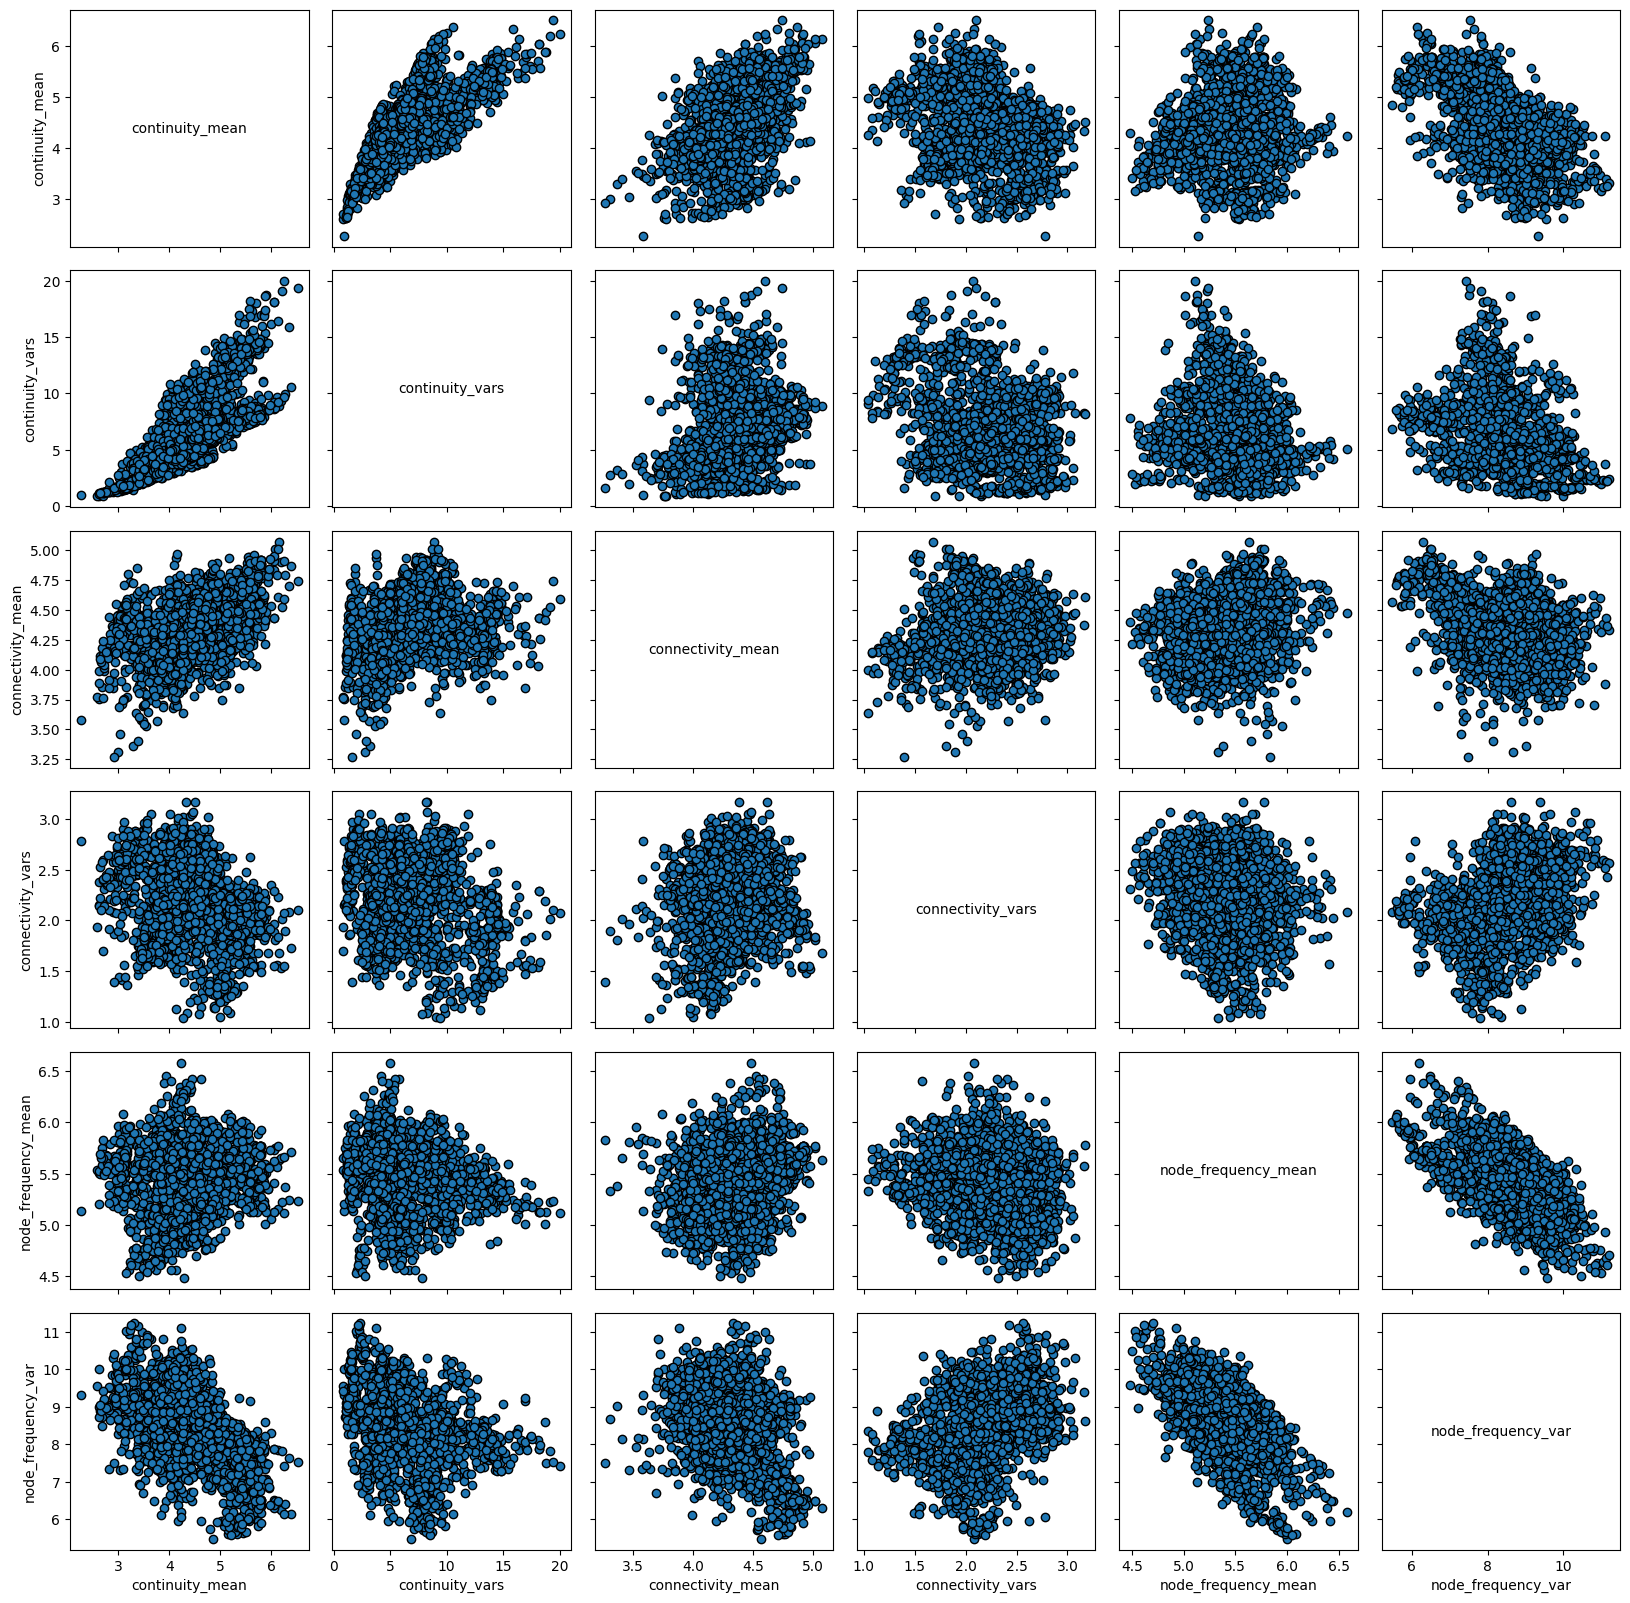

In [11]:
fig, axes = pairs_plotting.pairs_scatter(experiments_combined, outcomes_combined, legend=True)
fig.set_size_inches(20, 20)
plt.show()